In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Parte 1: Exploración de Datos

In [2]:
# Cargar el dataset
file_path = r"C:\Users\daniela.risco\music-genre-classification\dataset.csv"
music_data = pd.read_csv(file_path)

In [3]:
print("Primeras filas del dataset:")
print(music_data.head())

print("\nInformación general del dataset:")
print(music_data.info())

print("\nDescripción estadística:")
print(music_data.describe())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(music_data.isnull().sum())

Primeras filas del dataset:
        Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0  114.618354       57.976367       53.251766            99.061840   
1  116.672803       69.387087       95.787280            90.831033   
2  128.328121       52.930677       65.701187           104.439247   
3  128.511337       25.494755       14.095374            40.106130   
4  135.474190       45.174876      101.469872            70.002203   

   String Instrument Detection  Electronic Element Presence  \
0                    14.686768                    17.628630   
1                    47.280419                   -15.618194   
2                     5.984994                    50.467388   
3                    47.715584                    87.335201   
4                   108.177637                    25.865590   

   Rhythm Complexity  Drums Influence  Distorted Guitar  Metal Frequencies  \
0          46.545522        75.839434         79.378892          71.753088   
1          85.42

### Parte 2: Análisis de Correlación

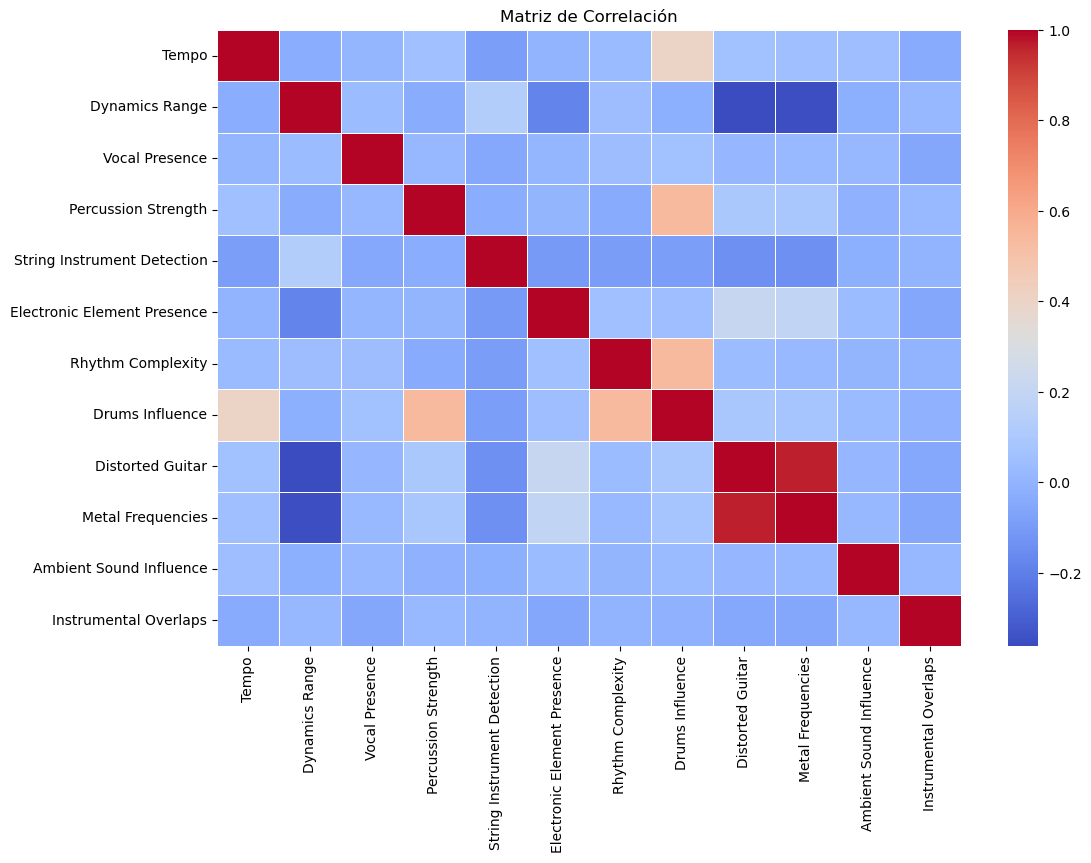

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(music_data.drop(columns=['Genre']).corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

### Parte 3: PCA para Reducción de Dimensionalidad

Varianza explicada por cada componente principal:
[0.20124871 0.15042515 0.09266609 0.08680459 0.08516604 0.08178983
 0.07900191 0.07737509]
0.8544774084133171


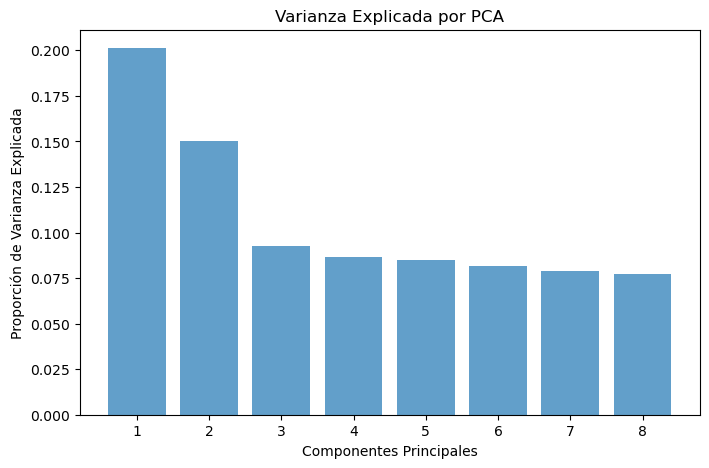

In [5]:
features = music_data.drop(columns=['Genre'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=8)
pca_features = pca.fit_transform(scaled_features)

print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

plt.figure(figsize=(8,5))
plt.bar(range(1, 9), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.xlabel('Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Varianza Explicada por PCA')
plt.show()

### Parte 4: Evaluación de Clasificación con y sin PCA

In [6]:
music_data_clean = music_data.dropna(subset=['Genre'])

X = music_data_clean.drop(columns=['Genre'])
y = music_data_clean['Genre']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=8)
pca_features = pca.fit_transform(X_scaled)


# Modelo con datos originales
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

model_original = LogisticRegression(max_iter=5000, solver='saga')
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)

print("\n📊 Reporte de Clasificación - Datos Originales:")
print(classification_report(y_test, y_pred_original))


# Modelo con datos PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_features, y_encoded, test_size=0.2, random_state=42)

model_pca = LogisticRegression(max_iter=5000, solver='saga')
model_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = model_pca.predict(X_test_pca)

print("\n📊 Reporte de Clasificación - Datos con PCA:")
print(classification_report(y_test_pca, y_pred_pca))


📊 Reporte de Clasificación - Datos Originales:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        39
           1       0.29      0.32      0.31        31
           2       0.48      0.36      0.41        33
           3       0.57      0.47      0.51        43
           4       0.43      0.59      0.50        32

    accuracy                           0.56       178
   macro avg       0.55      0.54      0.54       178
weighted avg       0.56      0.56      0.55       178


📊 Reporte de Clasificación - Datos con PCA:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.31      0.32      0.32        31
           2       0.45      0.39      0.42        33
           3       0.49      0.42      0.45        43
           4       0.40      0.53      0.46        32

    accuracy                           0.53       178
   macro avg       0.53      0.52     

### Parte 5: Predicción e Integración

In [7]:
unlabeled_mask = music_data['Genre'].isnull()
unlabeled_data = music_data[unlabeled_mask].drop(columns=['Genre'])
scaled_unlabeled = scaler.transform(unlabeled_data)
unlabeled_pca = pca.transform(scaled_unlabeled)

predicted_genres = model_pca.predict(unlabeled_pca)
music_data.loc[unlabeled_mask, 'Genre'] = le.inverse_transform(predicted_genres)

print("\nGéneros Predichos:")
print(music_data[unlabeled_mask])


Géneros Predichos:
          Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
13   104.389822       65.826509       45.855410            55.655533   
18   101.367152       47.843370       93.230347            67.101777   
22    85.130539       55.707108       81.149615            21.473425   
31   121.100952       71.769727       49.609529            82.539647   
42    93.546825       44.563761       56.587554            99.546134   
..          ...             ...             ...                  ...   
991  130.719110       65.990957       21.775950            91.817048   
992  117.892313       35.001524       76.506358            77.972570   
993  104.315096       26.173723        3.334345            42.132602   
994  121.863373       50.872678       70.100162           106.212013   
995   66.578839       54.533872       99.782246            95.633310   

     String Instrument Detection  Electronic Element Presence  \
13                     76.058845                  

In [8]:
# Verificar valores nulos luego de la imputación del modelo
print("\nValores nulos por columna:")
print(music_data.isnull().sum())


Valores nulos por columna:
Tempo                          0
Dynamics Range                 0
Vocal Presence                 0
Percussion Strength            0
String Instrument Detection    0
Electronic Element Presence    0
Rhythm Complexity              0
Drums Influence                0
Distorted Guitar               0
Metal Frequencies              0
Ambient Sound Influence        0
Instrumental Overlaps          0
Genre                          0
dtype: int64
